# <u>Métodos Supervisados para Clasificación - Parte 1</u>

## Caso de uso

<img src = 'https://datahack-prod.s3.ap-south-1.amazonaws.com/__sized__/contest_cover/loanpre-thumbnail-1200x1200.png'>

### Importación de librerías iniciales

In [1]:
import warnings
warnings.filterwarnings("ignore")

#Importar las librerías necesarias en Python.
import pandas as pd      ## Manejo de dataframes o set de datos
import numpy as np       ## Todo lo referente a trabajar con vectores y matrices
from scipy import stats  ## Herramientas y algoritmos matemáticos para python

import seaborn as sns
import matplotlib.pyplot as plt

Usamos una semilla a lo largo de todo el notebook para los procesos aleatorios

In [2]:
seed = 2021

In [3]:
target = 'Loan_Status'

### **Lectura Inicial de base de datos**

Utilizaremos las bases de este caso ya preprocesadas en el notebook del Módulo 13. Estas bases ya recibieron el siguiente tratamiento previo:

1. División train test 80/20
2. Tratamiento de nulos
3. Labeling de variables
4. Encoding de variables categóricas (dummys)
5. Tratamiento de valores extremos y outliers
6. Creación de nuevas variables
7. Reescalamiento final de la base

¡OJO! No olvidar balancear la base de train si su target < 5% (no pasar de 15%-25% en el target balanceado)

In [4]:
train = pd.read_csv(r'C:\Users\dg_su\OneDrive - Universidad Tecnologica del Peru\Estudios\Cursos\Analisis de Datos\Programa Data Science for Business\codigo\base de datos\train_preprocesed.csv')
test = pd.read_csv(r'C:\Users\dg_su\OneDrive - Universidad Tecnologica del Peru\Estudios\Cursos\Analisis de Datos\Programa Data Science for Business\codigo\base de datos\test_preprocesed.csv')

In [5]:
# Vemos la dimensionalidad de la base train
train.shape

(491, 19)

In [6]:
# Vemos la dimensionalidad de la base test
test.shape

(123, 19)

In [7]:
# Visualizacion Global de los datos train
train.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,TotalIncome,TotalIncomeByPerson,Cuota,%Cuota,log_ApplicantIncome,log_TotalIncome,Loan_Status
0,0.000000,0.113708,0.055992,0.175109,0.72973,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.136943,0.171976,0.078520,0.035756,0.446196,0.469985,0
1,0.000000,0.035520,0.077687,0.244573,0.72973,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.095746,0.127927,0.109669,0.068946,0.223800,0.389110,1
2,0.333333,0.029778,0.058464,0.176556,0.72973,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.071664,0.045152,0.079169,0.061638,0.197700,0.329002,0
3,0.000000,0.086533,0.000000,0.147612,0.72973,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.058360,0.087954,0.066191,0.059488,0.387001,0.289669,0
4,0.000000,0.094018,0.082727,0.205499,0.72973,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.148086,0.183890,0.092148,0.039522,0.404591,0.488526,0


In [8]:
# Visualizacion Global de los datos test
test.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,TotalIncome,TotalIncomeByPerson,Cuota,%Cuota,log_ApplicantIncome,log_TotalIncome,Loan_Status
0,0.000000,0.112643,0.0,0.189716,1.00000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.109324,0.138849,0.021630,0.025984,0.378917,0.364678,1
1,0.333333,0.087669,0.0,0.079787,0.74359,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.084257,0.045790,0.013661,0.020916,0.324281,0.308791,1
2,0.000000,0.014227,0.0,0.042553,0.74359,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.010540,0.043339,0.007286,0.042511,0.078563,0.057440,1
3,0.333333,0.034982,0.0,0.104610,0.74359,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.031372,0.020224,0.017911,0.055796,0.167845,0.148768,0
4,0.000000,0.209612,0.0,0.308511,0.74359,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.206656,0.232954,0.052823,0.036787,0.533293,0.522594,0


In [9]:
X_train = train.drop(target, axis =1)
y_train = train[target]

X_test = test.drop(target, axis =1)
y_test = test[target]

## Algoritmos Machine Learning

### Regresion Logistica Binaria

In [10]:
# Paso N°01: Elegimos y entrenamos un algoritmo de ML
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [11]:
#hiperparámetros del modelo estimado
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [12]:
lr.fit(X_train,y_train) # Entrenamiento!

LogisticRegression()

In [13]:
# variables
lr.feature_names_in_

array(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'TotalIncome',
       'TotalIncomeByPerson', 'Cuota', '%Cuota', 'log_ApplicantIncome',
       'log_TotalIncome'], dtype=object)

In [14]:
# coeficientes del modelo
lr.coef_

array([[ 0.04588197, -0.08788397,  0.6126909 ,  0.46323909,  0.3608403 ,
        -3.23199196, -0.05588013, -0.58964073,  0.07914149, -0.23496561,
        -0.67563815, -0.08093916,  0.54665395,  0.72150204,  0.60106064,
         0.93037643,  0.01460273, -0.35718545]])

In [15]:
lr.predict_proba(X_test)[:,1]   # Predicción de la probabilidad

array([0.92631198, 0.32351061, 0.84851525, 0.08994579, 0.3303144 ,
       0.32119682, 0.36051603, 0.170175  , 0.11357041, 0.13628005,
       0.19191615, 0.21725296, 0.22142065, 0.16058669, 0.86657723,
       0.10600215, 0.21564928, 0.30025333, 0.1461948 , 0.13013758,
       0.23781569, 0.80417118, 0.22174282, 0.20802983, 0.20859124,
       0.29518412, 0.12329853, 0.26370968, 0.15709791, 0.23455394,
       0.80011978, 0.32551978, 0.20707775, 0.12462101, 0.09912192,
       0.1712471 , 0.36246112, 0.42506669, 0.50697227, 0.13880705,
       0.19944165, 0.18739913, 0.2203804 , 0.21723015, 0.33430194,
       0.24538748, 0.13722653, 0.18688886, 0.13944361, 0.29714979,
       0.26099027, 0.3541438 , 0.29838687, 0.14029277, 0.19577083,
       0.21209966, 0.22765939, 0.20392752, 0.23681641, 0.33623624,
       0.23848097, 0.72112646, 0.12082026, 0.30127413, 0.21873087,
       0.13669675, 0.88646361, 0.29247605, 0.17057578, 0.92774587,
       0.35446875, 0.20960173, 0.3334126 , 0.17910786, 0.10780

In [17]:
lr.predict(X_test)  # Predicción de la categoría (usando el umbral de 50% que viene por defecto)

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [18]:
# Paso N°02: Con el algoritmo entrenado predecimos sobre la data de train y test!

y_pred_train=lr.predict(X_train) # Prediccion sobre el train
y_pred_test= lr.predict(X_test) # Prediccion sobre el test

y_proba_test= lr.predict_proba(X_test)[:,1]   #Prediccion de probabilidades del target

In [20]:
# Paso N°03: Revisamos las metricas de validacion técnicas adecuadas!
from sklearn import metrics as metrics

def metricas_confusion(y_train,y_pred_train,y_test,y_pred_test):
    # Matriz de confusion
    print("Matriz confusion: Train")
    cm_train = metrics.confusion_matrix(y_train,y_pred_train)
    print(cm_train)

    print("Matriz confusion: Test")
    cm_test = metrics.confusion_matrix(y_test,y_pred_test)
    print(cm_test)

    # Accuracy
    print("Accuracy: Train")
    accuracy_train=metrics.accuracy_score(y_train,y_pred_train)
    print(accuracy_train)

    print("Accuracy: Test")
    accuracy_test=metrics.accuracy_score(y_test,y_pred_test)
    print(accuracy_test)

    # Precision o Aporte del Modelo
    print("Precision: Train")
    precision_train=metrics.precision_score(y_train,y_pred_train)
    print(precision_train)

    print("Precision: Test")
    precision_test=metrics.precision_score(y_test,y_pred_test)
    print(precision_test)

    # Recall o Sensibilidad 
    print("Recall: Train")
    recall_train=metrics.recall_score(y_train,y_pred_train)
    print(recall_train)

    print("Recall: Test")
    recall_test=metrics.recall_score(y_test,y_pred_test)
    print(recall_test)

In [21]:
metricas_confusion(y_train,y_pred_train,y_test,y_pred_test)

Matriz confusion: Train
[[330   7]
 [ 84  70]]
Matriz confusion: Test
[[83  2]
 [24 14]]
Accuracy: Train
0.814663951120163
Accuracy: Test
0.7886178861788617
Precision: Train
0.9090909090909091
Precision: Test
0.875
Recall: Train
0.45454545454545453
Recall: Test
0.3684210526315789


Se puede observar por el accuracy que el modelo no presenta sobreajuste (overfitting) en los datos de train y test,  Tambien se nota que el modelo tiene una presición alta tanto en el train (90%) y en el test (87.5%), pero en modelo no es muy sensible (tiene una diferencia de recall alta) en train 45% y test 36%.

Para mejorar tanto la sensibilidad y la presición se debe o aumentar los datos de entrenamiento o incrementar las variables predictoras

In [22]:
from sklearn.metrics import classification_report

print(metrics.classification_report(y_test, y_pred_test)) #colocas el y (real) , y^ (predicho)

              precision    recall  f1-score   support

           0       0.78      0.98      0.86        85
           1       0.88      0.37      0.52        38

    accuracy                           0.79       123
   macro avg       0.83      0.67      0.69       123
weighted avg       0.81      0.79      0.76       123



el F1-score tiene que ser mayor al 50% es lo minimo aceptable

In [23]:
from sklearn.metrics import roc_auc_score, roc_curve

def plot_roc_curve(y, y_proba, label = ''):
    '''
    dibujar la curva roc para las probabilidades y target entregados
    
    params:
    y: etiquetas originales
    y_proba: probabilidades resultado del modelo
    '''
    
    auc_roc = roc_auc_score(y, y_proba)
    fpr, tpr, thresholds = roc_curve(y, y_proba)
    
    plt.figure(figsize=(8,6))
    plt.rcParams.update({'font.size': 12})
    plt.plot(fpr, fpr, c = 'red')
    plt.plot(fpr, tpr, label= (f"Curva ROC {label} (AUC = {auc_roc:.4f})"))
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title(f"Curva ROC {label}")
    plt.legend(loc=4, numpoints=1)

In [24]:
# ROC AUC
roc_auc_score(y_test, y_proba_test)

0.746749226006192

es buen modelo 74%

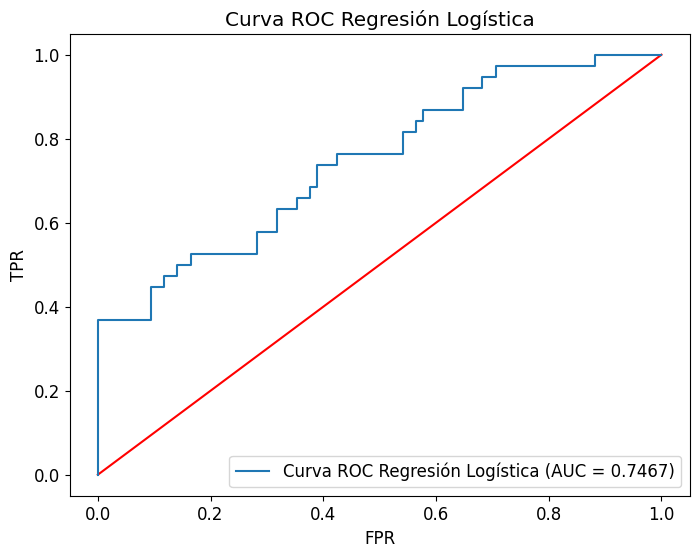

In [25]:
# Gráfica Curva ROC
plot_roc_curve(y_test, y_proba_test, 'Regresión Logística')

no sale una curva debido a que la data es poca, con mayor cantidad de datos se observa una mejor forma curvilinea

### Ejecutando con varios optimizadores y reguladores
Construiremos el modelo de Regresión logística nuevamente para el mismo conjunto de datos, pero esta vez, usa diferentes valores de <b>solver</b> y <b>regularization</b>. Con esto podemos hacer comparaciones de varios modelos hasta encontrar el más adecuado:

In [27]:
solvers=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] #solver optimizadores de la regresion logistica
Cs=[0.01,0.02,0.05,0.1] #reguladores, permiten hacer mas rapido o lento la aproximacion del algoritmo

for s in solvers:
    for c in Cs:
        LR = LogisticRegression(C=c, solver=s).fit(X_train,y_train)
        yhat = LR.predict(X_test)
        yhat_prob = LR.predict_proba(X_test)[:,1]
        print("Solver="+s+", C="+str(c)+
              "->Accuracy: "+str(metrics.accuracy_score(y_test, yhat)) +
              "->Recall: "+str(metrics.recall_score(y_test, yhat)) +
             "->AUC : "+str(roc_auc_score(y_test, yhat_prob)))

Solver=newton-cg, C=0.01->Accuracy: 0.6910569105691057->Recall: 0.0->AUC : 0.7578947368421053
Solver=newton-cg, C=0.02->Accuracy: 0.6910569105691057->Recall: 0.0->AUC : 0.7582043343653251
Solver=newton-cg, C=0.05->Accuracy: 0.7886178861788617->Recall: 0.3157894736842105->AUC : 0.7520123839009288
Solver=newton-cg, C=0.1->Accuracy: 0.8048780487804879->Recall: 0.3684210526315789->AUC : 0.7442724458204334
Solver=lbfgs, C=0.01->Accuracy: 0.6910569105691057->Recall: 0.0->AUC : 0.7585139318885449
Solver=lbfgs, C=0.02->Accuracy: 0.6910569105691057->Recall: 0.0->AUC : 0.7582043343653251
Solver=lbfgs, C=0.05->Accuracy: 0.7886178861788617->Recall: 0.3157894736842105->AUC : 0.7520123839009288
Solver=lbfgs, C=0.1->Accuracy: 0.8048780487804879->Recall: 0.3684210526315789->AUC : 0.7442724458204334
Solver=liblinear, C=0.01->Accuracy: 0.6910569105691057->Recall: 0.0->AUC : 0.7436532507739939
Solver=liblinear, C=0.02->Accuracy: 0.7073170731707317->Recall: 0.05263157894736842->AUC : 0.7551083591331269
So

### Análisis Discriminante

Este modelo tiene que cumplir con todos los supuestos de la regresión lineal y todas sus variables tienen que ser númericas

In [29]:
# Análisis discriminante lineal y cuadrático
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA

lda = LDA() #Analisis discriminante lineal
model_lda = lda.fit(X_train, y_train)

qda = QDA() #Analisis discriminante quadratico
model_qda = qda.fit(X_train, y_train)

In [30]:
# Predecimos! LDA
Y_pred_train = lda.predict(X_train) # realizando la predicción
Y_pred_test  = lda.predict(X_test) # realizando la predicción

Y_proba_test= lda.predict_proba(X_test)[:,1]   #Prediccion de probabilidades del target

In [31]:
#Cálculo de los indicadores mas relevantes!
metricas_confusion(y_train,Y_pred_train,y_test,Y_pred_test)

Matriz confusion: Train
[[327  10]
 [ 81  73]]
Matriz confusion: Test
[[64 21]
 [16 22]]
Accuracy: Train
0.814663951120163
Accuracy: Test
0.6991869918699187
Precision: Train
0.8795180722891566
Precision: Test
0.5116279069767442
Recall: Train
0.474025974025974
Recall: Test
0.5789473684210527


In [32]:
print(metrics.classification_report(y_test, Y_pred_test))

              precision    recall  f1-score   support

           0       0.80      0.75      0.78        85
           1       0.51      0.58      0.54        38

    accuracy                           0.70       123
   macro avg       0.66      0.67      0.66       123
weighted avg       0.71      0.70      0.70       123



In [33]:
# ROC AUC
roc_auc_score(y_test, Y_proba_test)

0.6904024767801858

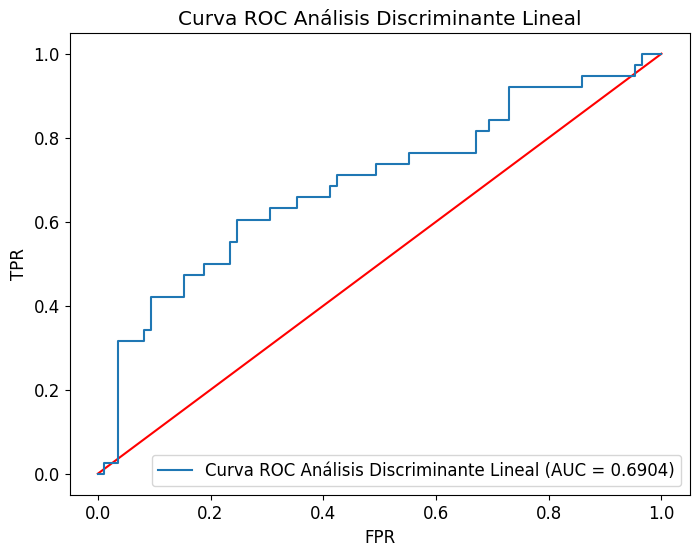

In [34]:
# Gráfica Curva ROC
plot_roc_curve(y_test, Y_proba_test, 'Análisis Discriminante Lineal')

La curva ROC nos muestra un detalle interesante, para valores que van desde 0.2 a 0.8 presenta un gradoi de discriminación amplio, pero de 0.8 a 1 el umbral se achica demasiado, lo nos indica que este modelo funciona bien para umbrales chicos, pero para umbrales grandes falla, 0.8 no discrimina bien los valores predichos

In [35]:
# Predecimos! QDA
Y_pred_train = qda.predict(X_train) # realizando la predicción
Y_pred_test  = qda.predict(X_test) # realizando la predicción

Y_proba_test= qda.predict_proba(X_test)[:,1]   #Prediccion de probabilidades del target

In [36]:
#Cálculo de los indicadores mas relevantes!
metricas_confusion(y_train,Y_pred_train,y_test,Y_pred_test)

Matriz confusion: Train
[[316  21]
 [ 69  85]]
Matriz confusion: Test
[[ 0 85]
 [ 0 38]]
Accuracy: Train
0.8167006109979633
Accuracy: Test
0.3089430894308943
Precision: Train
0.8018867924528302
Precision: Test
0.3089430894308943
Recall: Train
0.551948051948052
Recall: Test
1.0


El modelo presenta sobreajuste severo, se puede observar que el accuracy entre el train y test varia demasiado, tambien hay gran variacion en la precision y el recall

In [101]:
print(metrics.classification_report(y_test, Y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        85
           1       0.31      1.00      0.47        38

    accuracy                           0.31       123
   macro avg       0.15      0.50      0.24       123
weighted avg       0.10      0.31      0.15       123



In [37]:
# ROC AUC
roc_auc_score(y_test, Y_proba_test)

0.5

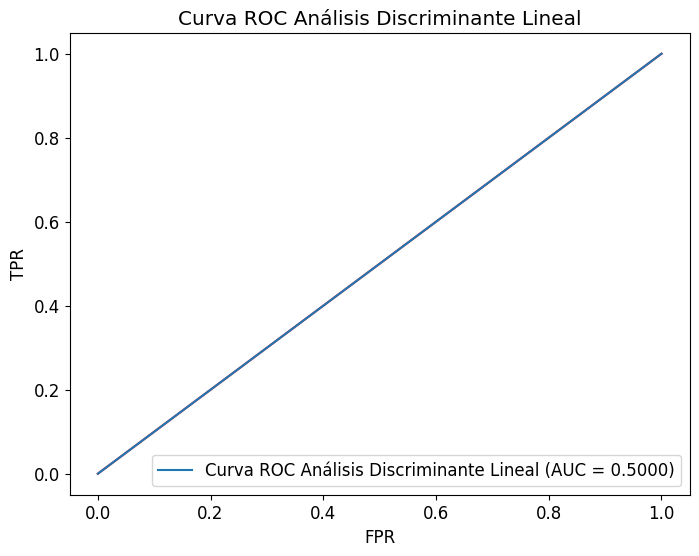

In [38]:
# Gráfica Curva ROC
plot_roc_curve(y_test, Y_proba_test, 'Análisis Discriminante Lineal')

### Árbol de Clasificación CART

Para usar los arboles se tiene que tener cuidado ya que con sus hiperparametros por defecto puede presentar sobreajuste

In [42]:
# Arbol de Clasificacion CART ejemplo1
from sklearn.tree import DecisionTreeClassifier
tree_bonsai = DecisionTreeClassifier(
                       ccp_alpha=0.0, 
                       class_weight=None, 
                       criterion='gini',
                       max_depth=2,           # Profundidad del arbol
                       max_features=3,        # Numero maximo de variables
                       max_leaf_nodes=None,   # Numero de nodos
                       min_samples_leaf=100, 
                       min_samples_split=200,
                       min_weight_fraction_leaf=0.0, 
                       random_state=None, 
                       splitter='best')

In [40]:
# Arbol de Clasificacion CART ejemplo2
from sklearn.tree import DecisionTreeClassifier
tree_complete = DecisionTreeClassifier()

In [68]:
# Arbol de Clasificacion CART (Experto) ejemplo3
from sklearn.tree import DecisionTreeClassifier
tree_expert = DecisionTreeClassifier(
                       ccp_alpha=0.0, 
                       class_weight=None, 
                       criterion='gini',
                       max_depth=6,         # Profundidad del arbol (4)
                       max_features=8,     # Numero maximo de variables
                       max_leaf_nodes=None, # Numero de nodos
                       min_samples_leaf=40, #se recomienda la 5% de tamaño de las hojas del arbol de la cantidad de registros de train
                       min_samples_split=80, #se recomienta 10% del tamaño de las ramas de la cantidad de los datos de train
                       min_weight_fraction_leaf=0.0, 
                       random_state=None, 
                       splitter='best')

In [69]:
# Entrenamos!
tree_bonsai = tree_bonsai.fit(X_train,y_train) # ajustando el modelo a mis datos
tree_complete = tree_complete.fit(X_train,y_train) # ajustando el modelo a mis datos
tree_expert = tree_expert.fit(X_train,y_train) # ajustando el modelo a mis datos

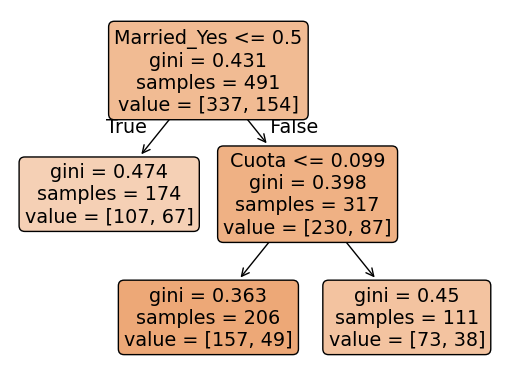

In [48]:
# Visualizando el arbol!
from sklearn.tree import plot_tree
_ = plot_tree(tree_bonsai, feature_names = X_train.columns, rounded = True, filled = True)

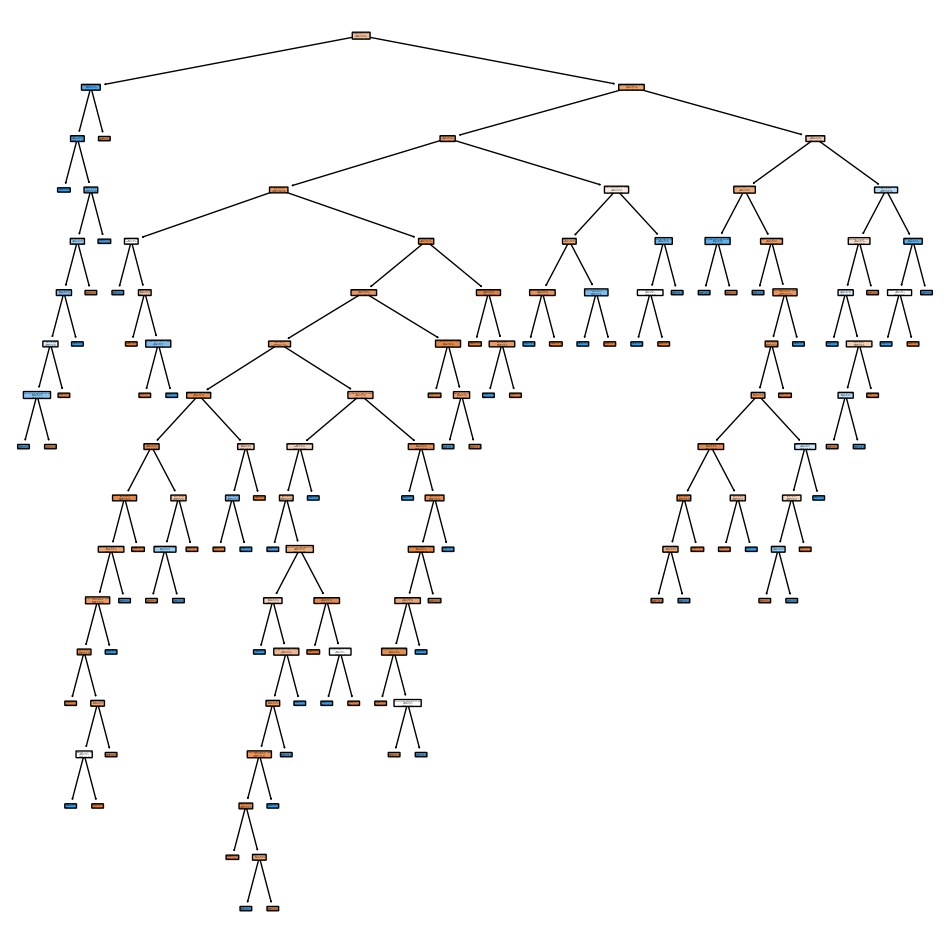

In [110]:
plt.figure(figsize=(12,12))
_ = plot_tree(tree_complete, feature_names = X_train.columns, rounded = True, filled = True)
plt.show()

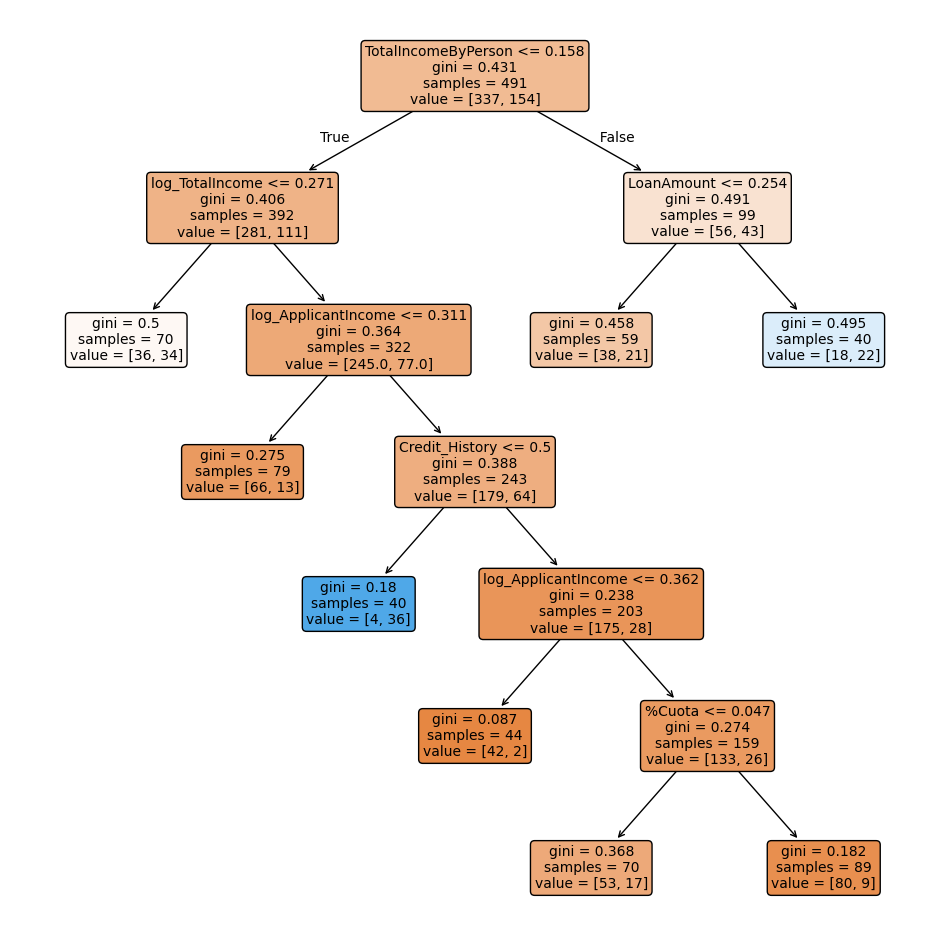

In [70]:
plt.figure(figsize=(12,12))
_ = plot_tree(tree_expert, fontsize= 10, feature_names = X_train.columns, rounded = True, filled = True)
plt.show()

In [57]:
# Predecimos! arbol bonsai
Y_pred_train1 = tree_bonsai.predict(X_train) # realizando la predicción
Y_pred_test1  = tree_bonsai.predict(X_test) # realizando la predicción

Y_proba_test1= tree_bonsai.predict_proba(X_test)[:,1]   #Prediccion de probabilidades del target

#Cálculo de los indicadores mas relevantes!
metricas_confusion(y_train,Y_pred_train1,y_test,Y_pred_test1)

Matriz confusion: Train
[[337   0]
 [154   0]]
Matriz confusion: Test
[[85  0]
 [38  0]]
Accuracy: Train
0.6863543788187373
Accuracy: Test
0.6910569105691057
Precision: Train
0.0
Precision: Test
0.0
Recall: Train
0.0
Recall: Test
0.0


In [59]:
# ROC AUC
roc_auc_score(y_test, Y_proba_test1)

0.46687306501547987

In [54]:
# Predecimos! arbol experto
Y_pred_train2 = tree_complete.predict(X_train) # realizando la predicción
Y_pred_test2  = tree_complete.predict(X_test) # realizando la predicción

Y_proba_test2 = tree_complete.predict_proba(X_test)[:,1]   #Prediccion de probabilidades del target

metricas_confusion(y_train,Y_pred_train2,y_test,Y_pred_test2)

Matriz confusion: Train
[[337   0]
 [  0 154]]
Matriz confusion: Test
[[61 24]
 [12 26]]
Accuracy: Train
1.0
Accuracy: Test
0.7073170731707317
Precision: Train
1.0
Precision: Test
0.52
Recall: Train
1.0
Recall: Test
0.6842105263157895


se ve claramente que presenta sobreajuste

In [60]:
# ROC AUC
roc_auc_score(y_test, Y_proba_test2)

0.7009287925696593

In [71]:
# Predecimos! arbol experto
Y_pred_train = tree_expert.predict(X_train) # realizando la predicción
Y_pred_test  = tree_expert.predict(X_test) # realizando la predicción

Y_proba_test= tree_expert.predict_proba(X_test)[:,1]   #Prediccion de probabilidades del target

#Cálculo de los indicadores mas relevantes!
metricas_confusion(y_train,Y_pred_train,y_test,Y_pred_test)

Matriz confusion: Train
[[315  22]
 [ 96  58]]
Matriz confusion: Test
[[72 13]
 [33  5]]
Accuracy: Train
0.7596741344195519
Accuracy: Test
0.6260162601626016
Precision: Train
0.725
Precision: Test
0.2777777777777778
Recall: Train
0.37662337662337664
Recall: Test
0.13157894736842105


In [114]:
print(metrics.classification_report(y_test, Y_pred_test))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88        85
           1       1.00      0.37      0.54        38

    accuracy                           0.80       123
   macro avg       0.89      0.68      0.71       123
weighted avg       0.85      0.80      0.77       123



In [72]:
# ROC AUC
roc_auc_score(y_test, Y_proba_test)

0.4634674922600619

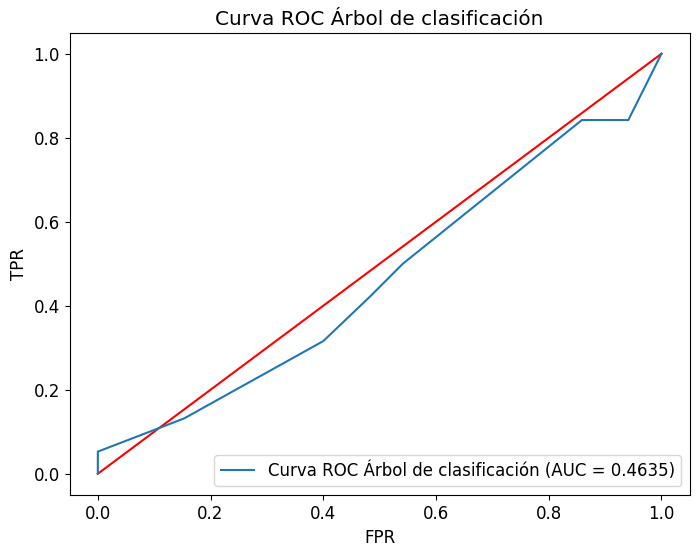

In [73]:
# Gráfica Curva ROC
plot_roc_curve(y_test, Y_proba_test, 'Árbol de clasificación')

### KNN

In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()   #se recomienda reescalar la base antes de usar esta técnica , normalizacion y escalamiento
scaler.fit(X_train)

X_train_ss = scaler.transform(X_train)
X_test_ss = scaler.transform(X_test)

In [80]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9) #tiene que ser impar para que no haya empates
knn.fit(X_train_ss, y_train)

KNeighborsClassifier(n_neighbors=9)

In [81]:
# Predecimos!
Y_pred_train = knn.predict(X_train_ss) # realizando la predicción
Y_pred_test  = knn.predict(X_test_ss) # realizando la predicción

Y_proba_test= knn.predict_proba(X_test_ss)[:,1]   #Prediccion de probabilidades del target

  File "c:\Users\dg_su\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [82]:
#Cálculo de los indicadores mas relevantes!
metricas_confusion(y_train,Y_pred_train,y_test,Y_pred_test)

Matriz confusion: Train
[[328   9]
 [ 83  71]]
Matriz confusion: Test
[[82  3]
 [26 12]]
Accuracy: Train
0.8126272912423625
Accuracy: Test
0.7642276422764228
Precision: Train
0.8875
Precision: Test
0.8
Recall: Train
0.461038961038961
Recall: Test
0.3157894736842105


In [83]:
print(metrics.classification_report(y_test, Y_pred_test))

              precision    recall  f1-score   support

           0       0.76      0.96      0.85        85
           1       0.80      0.32      0.45        38

    accuracy                           0.76       123
   macro avg       0.78      0.64      0.65       123
weighted avg       0.77      0.76      0.73       123



In [84]:
# ROC AUC
roc_auc_score(y_test, Y_proba_test)

0.6142414860681114

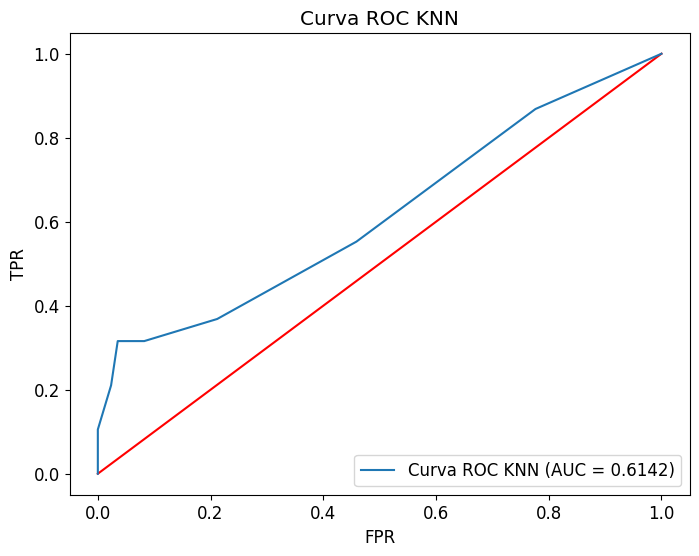

In [85]:
# Gráfica Curva ROC
plot_roc_curve(y_test, Y_proba_test, 'KNN')

#### Busqueda del mejor vecino

 Busqueda del mejor vecino

In [89]:
k_vecinos =[1,3,5,7,9,11,13,15,17,19,21,23,25,27,29]

for k in k_vecinos:
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train_ss, y_train)
    yhat = knn.predict(X_test)
    yhat_prob = knn.predict_proba(X_test)[:,1]
    print("K="+str(k_vecinos)+
            "->Accuracy: "+str(metrics.accuracy_score(y_test, yhat)) +
            "->Recall: "+str(metrics.recall_score(y_test, yhat)) +
            "->AUC : "+str(roc_auc_score(y_test, yhat_prob)))

K=[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]->Accuracy: 0.5934959349593496->Recall: 0.21052631578947367->AUC : 0.4876160990712074
K=[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]->Accuracy: 0.6829268292682927->Recall: 0.0->AUC : 0.5696594427244582
K=[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]->Accuracy: 0.6910569105691057->Recall: 0.0->AUC : 0.6017027863777089
K=[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]->Accuracy: 0.6910569105691057->Recall: 0.0->AUC : 0.6520123839009287
K=[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]->Accuracy: 0.6910569105691057->Recall: 0.0->AUC : 0.6540247678018577
K=[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]->Accuracy: 0.6910569105691057->Recall: 0.0->AUC : 0.646749226006192
K=[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]->Accuracy: 0.6910569105691057->Recall: 0.0->AUC : 0.6349845201238389
K=[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]->Accuracy: 0.6910569105691057->Recall:

El resultado de K-vecinos mas cercanos funciona mejor cuanto los datos estan juntos, cuando la data esta muy dispersa presenta problemas

### Búsqueda de hiperparpametros con GridSearch
Este procedimiento permite encontrar los mejores hiperparámetros de un modelo mediante una búsqueda exhaustiva.
Se entrega una lista de valores para distintos hiperparámetros del algoritmo.
Se evalúa el modelo para cada combinación de hiperparámetros y se selecciona la que obtenga mejores valores en la métrica de evaluación.

Construiremos el modelo SVM nuevamente para el mismo conjunto de datos, pero esta vez, con un algoritmo que busca los mejores hiperparámetros y utilizando Kernels Lineal y Radial.

In [91]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV  #para el gridsearch solo puede usar la data de train, no se puede usar la data de test
from sklearn.model_selection import ParameterGrid
import multiprocessing

Probemos esta búsqueda codiciosa con un árbol de decisión, haciendo búsquedas sobre varios parámetros importantes:

In [92]:
from sklearn.tree import DecisionTreeClassifier

In [94]:
# Grid de hiperparámetros evaluados - ARBOL CART
# ==============================================================================
param_grid = {'max_depth': [1,2,3,4,5,6,7,8,9,10],  #diferentes profundidades
              'max_features': [3,4,5,6,7,8,9],
              'min_samples_leaf': [20,35,50,100],
              'min_samples_split': [40,65,100,150,200]
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = DecisionTreeClassifier(
                    #hiperparametros que quedan sin alterar
                       ccp_alpha=0.0, 
                       class_weight=None, 
                       criterion='gini',
                       max_leaf_nodes=None,
                       min_weight_fraction_leaf=0.0, 
                       random_state=None, 
                       splitter='best'),
                    #hiperparametros que van a cambiar
        param_grid = param_grid,
        scoring    = 'roc_auc', #este es el estimador que va a usar para comprar y buscar el mejor modelo
        n_jobs     = multiprocessing.cpu_count() - 1, #fuerza todos los nucleos - 1
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), #validacion cruzada (5 particiones, 3 repeticiones, semilla aleatoria) se van realizar 3x5 = 15 validaciónes
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(10)

,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,mean_test_score,std_test_score,mean_train_score,std_train_score
1361,10,8,20,65,0.778327,0.042525,0.851551,0.011912
688,5,9,35,150,0.775323,0.049249,0.820114,0.010676
1381,10,9,20,65,0.768933,0.034812,0.845948,0.018828
1360,10,8,20,40,0.768359,0.047674,0.864383,0.015953
1103,8,9,20,150,0.767141,0.039288,0.822165,0.013194
809,6,8,35,200,0.765881,0.036063,0.812040,0.015202
1365,10,8,35,40,0.765010,0.041804,0.830758,0.017071
804,6,8,20,200,0.763478,0.048852,0.804418,0.029323
960,7,9,20,40,0.763427,0.044053,0.864213,0.023014
680,5,9,20,40,0.761287,0.046715,0.852569,0.014636


In [122]:
# Arbol de Clasificacion CART (mejores parámetros)
from sklearn.tree import DecisionTreeClassifier
tree_final = DecisionTreeClassifier(
                       ccp_alpha=0.0, 
                       class_weight=None, 
                       criterion='gini',
                       max_depth=10,         # Profundidad del arbol (4)
                       max_features=8,     # Numero maximo de variables
                       max_leaf_nodes=None, # Numero de nodos
                       min_samples_leaf=20, 
                       min_samples_split=65,
                       min_weight_fraction_leaf=0.0, 
                       random_state=None, 
                       splitter='best')

tree_final = tree_final.fit(X_train,y_train) # ajustando el modelo a mis datos

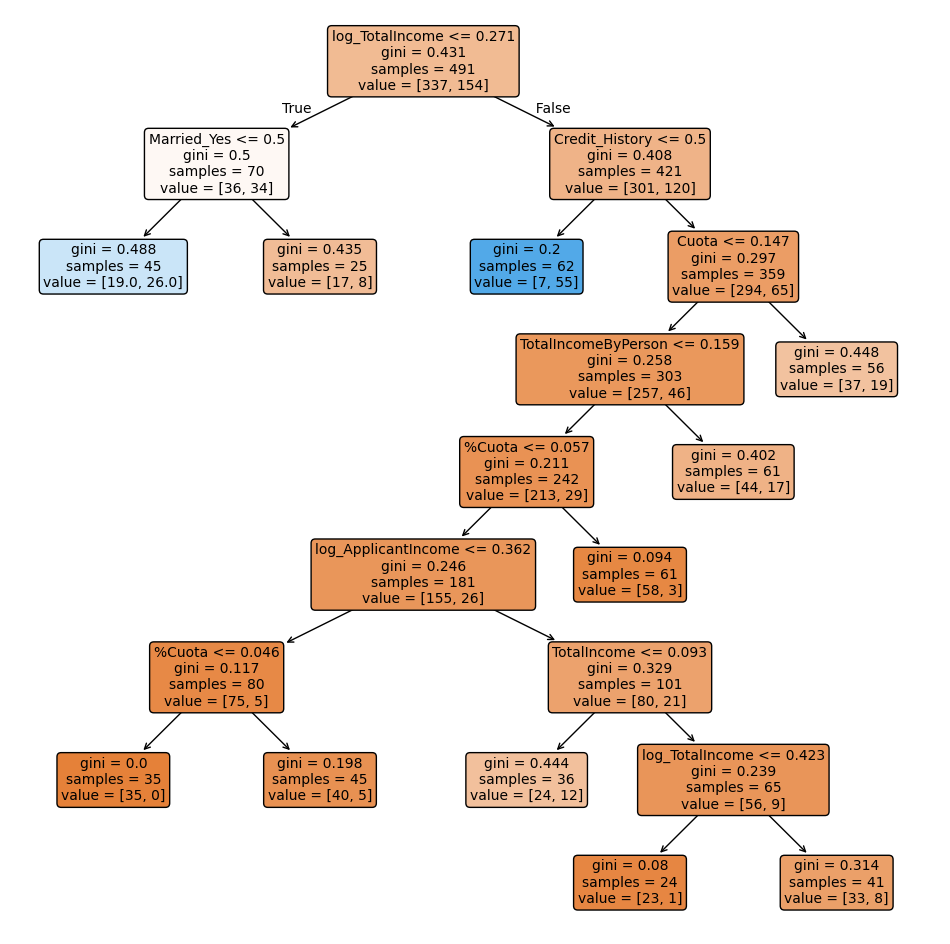

In [123]:
plt.figure(figsize=(12,12))
_ = plot_tree(tree_final, fontsize= 10, feature_names = X_train.columns, rounded = True, filled = True)
plt.show()

In [124]:
# Predecimos! 
Y_pred_train_final = tree_final.predict(X_train) # realizando la predicción
Y_pred_test_final  = tree_final.predict(X_test) # realizando la predicción

Y_proba_test_final= tree_final.predict_proba(X_test)[:,1]   #Prediccion de probabilidades del target

#Cálculo de los indicadores mas relevantes!
metricas_confusion(y_train,Y_pred_train_final,y_test,Y_pred_test_final)

Matriz confusion: Train
[[311  26]
 [ 73  81]]
Matriz confusion: Test
[[73 12]
 [25 13]]
Accuracy: Train
0.7983706720977597
Accuracy: Test
0.6991869918699187
Precision: Train
0.7570093457943925
Precision: Test
0.52
Recall: Train
0.525974025974026
Recall: Test
0.34210526315789475


In [125]:
print(metrics.classification_report(y_test, Y_pred_test_final))

              precision    recall  f1-score   support

           0       0.74      0.86      0.80        85
           1       0.52      0.34      0.41        38

    accuracy                           0.70       123
   macro avg       0.63      0.60      0.61       123
weighted avg       0.68      0.70      0.68       123



In [126]:
# ROC AUC
roc_auc_score(y_test, Y_proba_test_final)

0.6374613003095975

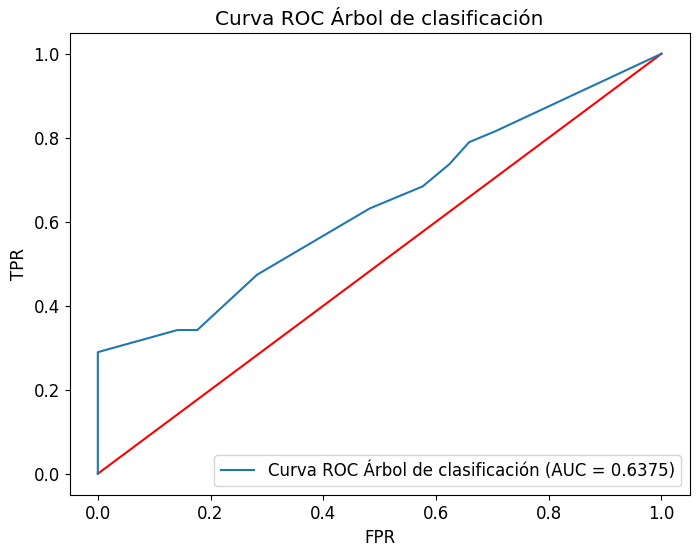

In [127]:
# Gráfica Curva ROC
plot_roc_curve(y_test, Y_proba_test_final, 'Árbol de clasificación')

Cuando tu dataset tiene gran cantidad de features (variables) puede pasar que exita problemas de multicolinealidad, es por ello que en estos casos se prefiere usar los modelos de arbol ya que no son menos propensos a problemas de multicolinealidad